In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import os.path as osp
import itertools
import astropy.io.fits as fits

from sources.preprocessor import data_processor # A well defined function to sample columns of interest from a full catalogue
from sources.normalisation import*
from sklearn.metrics import f1_score as f1
import timeit
import random
import seaborn as sns
# sns.set_style("white")

/users/walter/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mightee_data = pd.read_csv('old-test-train/raw_data_original.csv')

# We split the data into training and test size for further analysis
from sklearn.model_selection import train_test_split

labels = mightee_data['class_labels']
X = mightee_data.drop(['class_labels'], axis = 1)

# encoding target class
y, clas = pd.factorize(labels) #getting the class 0 = agn, 1 =notagn, 2 = no class
y_target = pd.DataFrame(y, columns = ['labels'])
X_train, X_test, y_train, y_test = train_test_split(X, y_target, stratify = y, test_size=0.25, random_state=42)

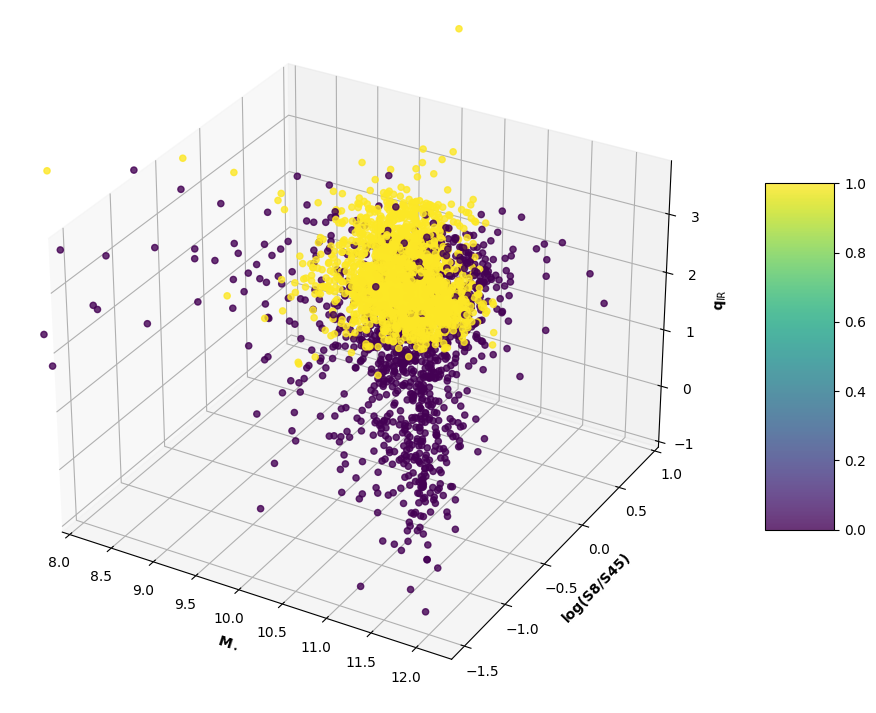

In [3]:
# Creating figure
fig = plt.figure(figsize = (16,9))
ax = plt.axes(projection ="3d")
 
# Creating plot
sctt = ax.scatter3D(xs =X_train['Mstar'], ys = X_train['log(S8/S45)'], zs = X_train['qir'], alpha = 0.8, c = y_train['labels'])
# plt.title("simple 3D scatter plot")
ax.set_xlim(8.0, 12.3)
ax.set_ylim(-1.6, 1)
ax.set_zlim(-1, 3.8)
ax.set_xlabel('M$_\star$', fontweight ='bold')
ax.set_ylabel('log(S8/S45)', fontweight ='bold')
ax.set_zlabel('q$_\mathrm{IR}$', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 
# show plot
plt.show()



In [4]:
y_train.reset_index(inplace = True)

In [5]:
y_train

,index,labels
0,1579,1
1,3546,1
2,3601,1
3,2947,1
4,1221,0
...,...,...
3199,3639,1
3200,299,0
3201,2364,1
3202,4263,1


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

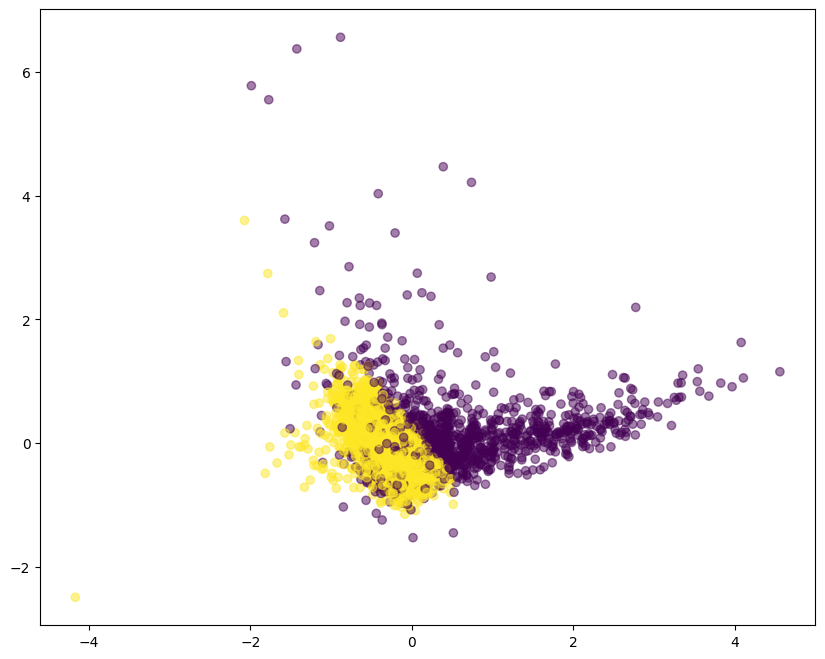

In [7]:
plt.figure(figsize = (10, 8))
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y_train['labels'], alpha = 0.5)
plt.show()

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)
tsne.kl_divergence_

1.1840354204177856

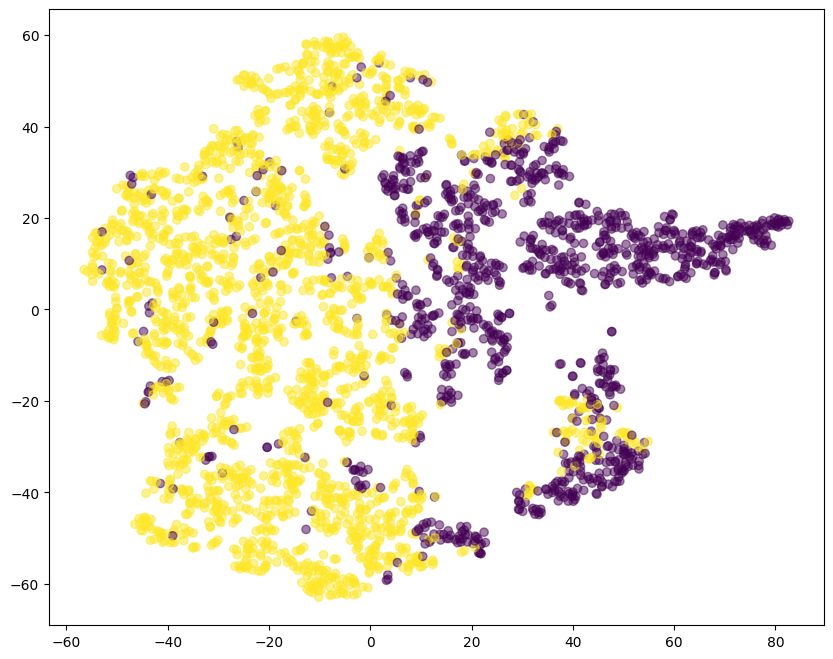

In [9]:
plt.figure(figsize = (10, 8))
plt.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], c=y_train['labels'], alpha = 0.5)
plt.show()

In [10]:
x_sne = np.array([X_tsne[:, 0], X_tsne[:, 1]]).T

df_sne = pd.DataFrame(x_sne, columns=[ 'X1', 'X2'])

df_sne['labels'] = y_train['labels']

In [11]:
df_sne

,X1,X2,labels
0,-20.576897,-45.730022,1
1,-14.629004,53.569828,1
2,0.344696,51.852070,1
3,-32.263237,6.079661,1
4,13.888995,-50.429333,0
...,...,...,...
3199,-29.757647,6.460155,1
3200,41.686283,11.489620,0
3201,-35.337414,15.800021,1
3202,3.450531,4.988935,1


In [12]:
from sources.ellipses import *
from sklearn.metrics import mean_squared_error, r2_score

drawGraph(df_sne[df_sne['labels']==1][['X1']],  
            df_sne[df_sne['labels']==1][['X2']],
            df_sne[df_sne['labels']==0][['X1']],
            df_sne[df_sne['labels']==0][['X2']],
           'X1', 
          'X2', 
          "cor3-tsne",
          [-63, 85], 
          [-72,70],
         text='(d)')



SFGs
correlation coefficient:-0.037927006749316095
error: 0.021852966579631282
p: 0.08264269969627984

AGNs
correlation coefficient:0.08468347998047135
error: 0.029866861024183858
p: 0.0045773223836783885
